In [3]:
"""
This script unpacks the 4-dimensional data from the ROOT file to a pickled pandas dataframe

See (eventually) process_ROOT_27D for the 27-dimensional equivalent. 
"""

import pandas as pd
import uproot
import numpy as np
from sklearn.model_selection import train_test_split

ROOTFilePath = 'data/DAOD_TRIG6.16825104._000230.pool.root.1'

processed_folder = 'processed_data/'

#Unused if auto_filename = True
train_filename = 'TLA_4D_leading_jets_train.pkl'
test_filename = 'TLA_4D_leading_jets_test.pkl'

#Fraction of data to be saved
data_frac = 1

tree = uproot.open(ROOTFilePath)['CollectionTree']

#Specifies the dataset. The available 'columns' can be read with ttree.keys()

branchnames = ['HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.m',
               'HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.pt',
               'HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.phi',
               'HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.eta']


df_dict = {}
for pp, branchname in enumerate(branchnames):
    print("Reading: " + branchname)
    variable = branchname.split('.')[1]
    df_dict[variable] = []
    jaggedX = tree.array(branchname)
    for ii, arr in enumerate(jaggedX):
        df_dict[variable].append(arr[0])

print('100%')
print('Creating DataFrame...')
df = pd.DataFrame(data=df_dict)
print('Head of data:')
print(df.head())

train, test = train_test_split(df, test_size=0.2, random_state=41)
    
partial_train_percent = train.sample(frac=data_frac, random_state=42).reset_index(drop=True)  # Pick out a fraction of the data
partial_test_percent = test.sample(frac=data_frac, random_state=42).reset_index(drop=True)

print("Train data shape: " + str(train.shape))
print("Test data shape: " + str(test.shape))
      
# Save train and test sets
print('Saving ' + processed_folder + train_filename)
train.to_pickle(processed_folder + train_filename)
print("Saving " + processed_folder + test_filename)
test.to_pickle(processed_folder + test_filename)

Reading: HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.m
Reading: HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.pt
Reading: HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.phi
Reading: HLT_xAOD__JetContainer_TrigHLTJetDSSelectorCollectionAuxDyn.eta
100%
Creating DataFrame...
Head of data:
             m             pt       phi       eta
0  8298.433594   90167.523438  1.535709  0.945709
1  7230.861816   73501.625000  0.305171 -0.279906
2  8883.339844   86142.484375 -1.587625  1.877115
3  8949.270508  115326.023438 -2.948715  0.831543
4  6370.583008  105564.234375  2.382645  2.381205
Train data shape: (1877123, 4)
Test data shape: (469281, 4)
Saving processed_data/TLA_4D_leading_jets_train.pkl
Saving processed_data/TLA_4D_leading_jets_test.pkl


[[ 5.28306152e+03  7.40139141e+04 -2.21486270e-01  1.73025644e+00]
 [ 7.59329395e+03  8.44805312e+04  1.52124596e+00 -2.34062481e+00]
 [ 1.27270586e+04  1.08316797e+05  5.49209893e-01 -2.33768485e-02]
 ...
 [ 1.87882461e+04  1.08288164e+05 -2.03741765e+00  4.60810810e-01]
 [ 1.09935254e+04  2.29160000e+05  1.25155020e+00 -2.10984659e+00]
 [ 8.81735938e+03  7.38257734e+04 -2.86873865e+00  2.27682567e+00]]


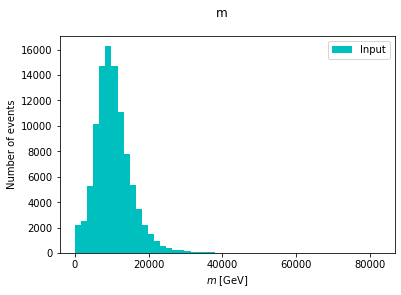

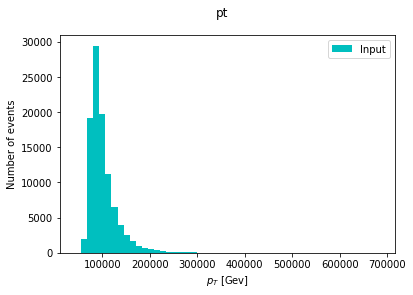

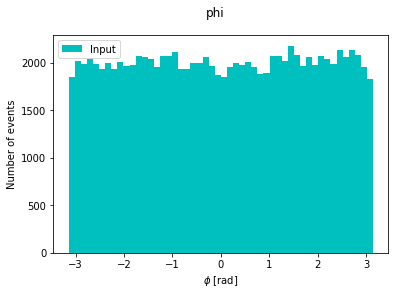

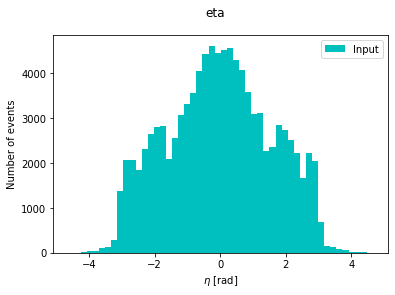

In [5]:
import matplotlib.pyplot as plt
import torch

plt.close('all')
unit_list = ['[GeV]', '[Gev]', '[rad]', '[rad]']
variable_list = [r'$m$', r'$p_T$', r'$\phi$', r'$\eta$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']

# Histograms
idxs = (0, 100000)  # Choose events to compare
data = test[idxs[0]:idxs[1]].values

print(data)

alph = 0.8
n_bins = 50
for kk in np.arange(4):
    plt.figure(kk + 4)
    n_hist_data, bin_edges, _ = plt.hist(data[:, kk], color=colors[1], label='Input', alpha=1, bins=n_bins)
    plt.suptitle(test.columns[kk])
    plt.xlabel(variable_list[kk] + ' ' + unit_list[kk])
    plt.ylabel('Number of events')
    # plt.yscale('log')
    plt.legend()
    fig_name = 'trainforever_hist_%s' % train.columns[kk]
    #plt.savefig(curr_save_folder + fig_name)